# Monday, March 10th

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Tartans

Let's get started working tartans by generating vertical and horizontal stripes for the following pattern (see project page for details):

B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by:

B : [52, 80, 100], K : [16, 16, 16], OG : [92, 100, 40]

What is the total width of this pattern?

In [11]:
total_width = 14 + 6 + 6 + 6 + 6 + 32 + 32
print(total_width)

102


Let's initialize an array that has shape `(102, 102, 3)`.

In [12]:
vertical_stripes = np.zeros((102,102,3))

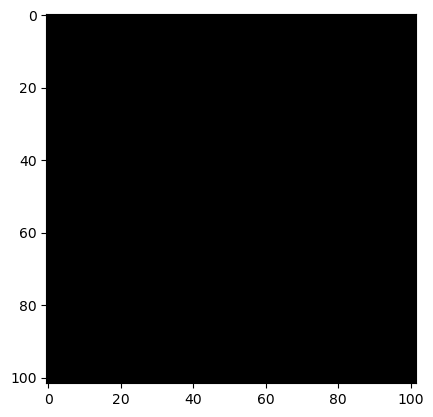

In [13]:
plt.imshow(vertical_stripes)

Right now, our array is a pure black picture. Let's add the first vertical stripe, which has color B = [52, 80, 100] and has width 14.

In [14]:
vertical_stripes[:, 0:14] = (52,80,100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..100.0].


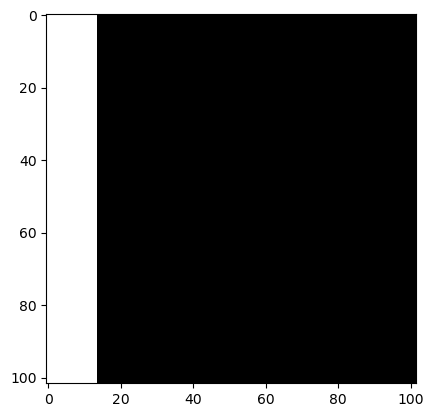

In [15]:
plt.imshow(vertical_stripes)

Note: `vertical_stripes` is an array of floating point data, so RGB information should be between `0` and `1`. We can either change `vertical_stripes` to be integer data and use integer RGB values (scaled between `0` and `255`), or rescale our RGB values to lie between `0` and `1`. For now, let's rescale to floats.

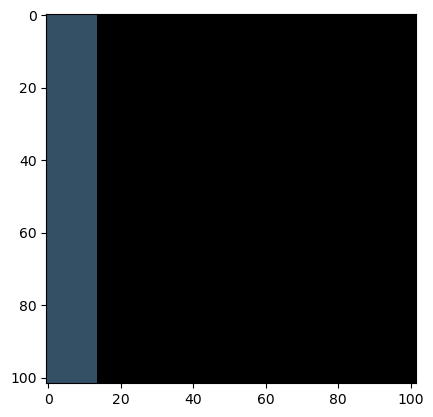

In [16]:
vertical_stripes[:, 0:14] = (52/255,80/255,100/255)

plt.imshow(vertical_stripes)

**Exercise:** Add the remaining stripes from our sample pattern to the `vertical_stripes` array:

B14 K6 B6 K6 B6 K32 OG32

B : [52, 80, 100], K : [16, 16, 16], OG : [92, 100, 40]

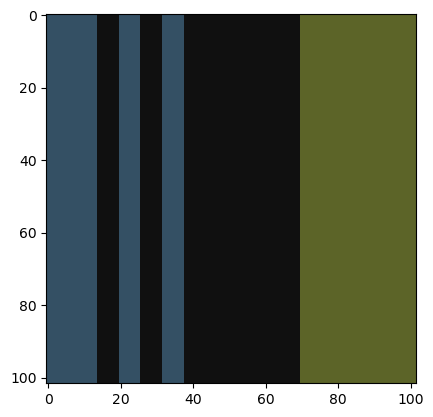

In [18]:
vertical_stripes = np.ones((102,102,3))
# Add the first stripe:
vertical_stripes[:, 0:14] = (52/255,80/255,100/255)
# Add the second stripe:
vertical_stripes[:,14:20] = (16/255, 16/255, 16/255)

# Add the rest of the stripes:
vertical_stripes[:,20:26] = (52/255, 80/255, 100/255)
vertical_stripes[:,26:32] = (16/255, 16/255, 16/255)
vertical_stripes[:,32:38] = (52/255, 80/255, 100/255)
vertical_stripes[:,38:70] = (16/255, 16/255, 16/255)
vertical_stripes[:,70:102] = (92/255, 100/255, 40/255)

plt.imshow(vertical_stripes)

Comments:
 - We need a much better way to generate this vertical stripes array. There was far too much manual typing/calculation to add each stripe. We'll come back and address this shortly.
 - Now that we have an array of vertical stripes, we can easily generate an array of horizontal stripes. This can be done using transposes (see below).
 - Once we have vertical and horizontal stripes, we need to super impose them somehow to generate the tartan pattern.

### Transposes

For a 2-dimensional matrix, the transpose flips rows and columns. In Python, we can use the `.T` method on a 2D array to get its transpose:

In [19]:
a = np.arange(25).reshape(5,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [20]:
print(a.T)

[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


We would like to take the transpose of our `vertical_stripes` array so that the columns of `vertical_stripes` become the rows of `horizontal_stripes`. 

**Problem:** The `vertical_stripes` array is a 3-dimensional array (rows, columns, color channels). What does `vertical_stripes.T` give us in this case?

In [23]:
vertical_stripes.shape

(102, 102, 3)

In [22]:
vertical_stripes.T.shape

(3, 102, 102)

It turns out that the `.T` method reverses the order of the axes. In this case, the color channel axis became the row axis, the column axis remained as the column axis, and the row axis became the color channel axis. For our purposes, this is not useful. Instead, we just want to swap the row and column axes.

We can use the `np.transpose` function to do more targeted transposing:

In [25]:
#help(np.transpose)

When using `np.transpose(vertical_stripes)`, we can optionally supply a keyword argument `axes`. In particular, using `axes = [1, 0, 2]` will give a transposed matrix where the old columns (axis `1`) become the new rows, the old rows (axis `0`) become the new columns, and the old color channel (axis `2`) remains as axis `2`.

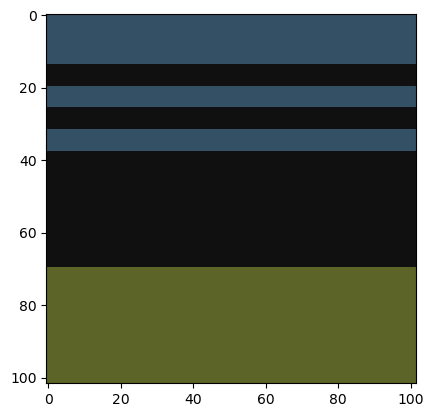

In [28]:
horizontal_stripes = np.transpose(vertical_stripes, axes=[1,0,2])

plt.imshow(horizontal_stripes)

We now have vertical and horizontal stripes. Can we combine them to get a tartan pattern?

One way to combine them is by taking the average:

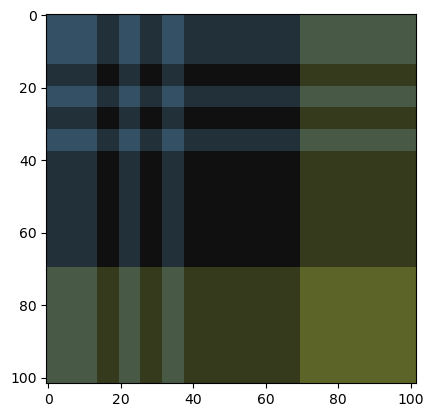

In [29]:
averaged_stripes = (vertical_stripes + horizontal_stripes) / 2

plt.imshow(averaged_stripes)

This gives flat colors rather than an interleaved combination. Can we instead generate a checkerboard pattern to interleave these stripes?

We want to go row by row, column by column, and alternatingly select a color from `vertical_stripes` and `horizontal_stripes`.

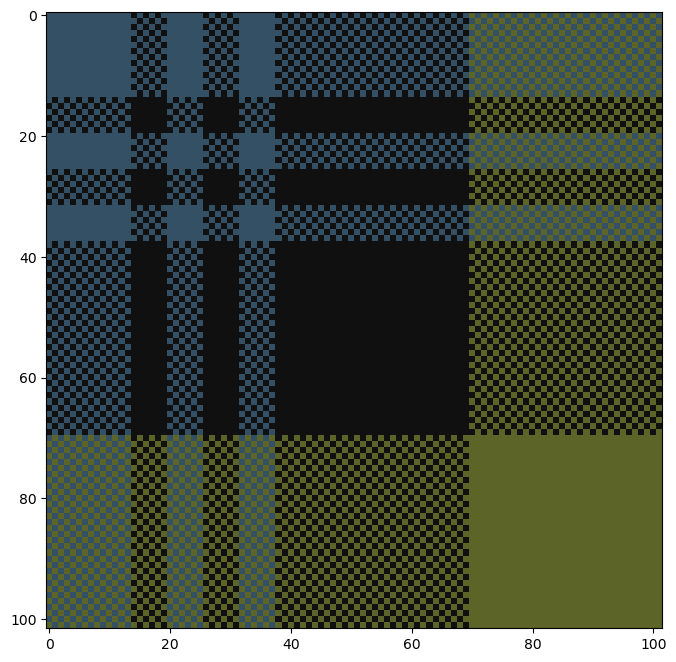

In [35]:
fig = plt.figure(figsize=(8,8))

checkerboard_tartan = np.zeros((102,102,3))

for i in range(102):
    for j in range(102):
        if (i + j) % 2 == 0:
            checkerboard_tartan[i,j] = vertical_stripes[i,j]
        else:
            checkerboard_tartan[i,j] = horizontal_stripes[i,j]
            
plt.imshow(checkerboard_tartan)

Where to go from here:
 - We need a better way of generating `vertical_stripes`.
 - We need to generate the more authentic tartan pattern described in the project page.
 - We need to pad our tartan pattern to be `500` by `500` rows/columns.

Let's go back to the beginning:

## Tartan pattern:

B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by:

B : [52, 80, 100], K : [16, 16, 16], OG : [92, 100, 40]

Can we code this information as some sort of Python list?

In [36]:
B = (52/255, 80/255, 100/255)
K = (16/255, 16/255, 16/255)
OG = (92/255, 100/255, 40/255)

widths = [14, 6, 6, 6, 6, 32, 32]
RGBs = [B, K, B, K, B, K, OG]

What is the total width of this pattern? We can use the `sum` function on `widths`:

In [38]:
total_width = sum(widths)
print(total_width)

102


In [39]:
vertical_stripes = np.zeros((total_width, total_width, 3))

Now we want to iterate through each width/RGB pair and add the corresponding stripe:

In [42]:
stripe_start = 0

for width, RGB in zip(widths, RGBs):
    vertical_stripes[:, stripe_start:stripe_start + width] = RGB
    
    stripe_start = stripe_start + width

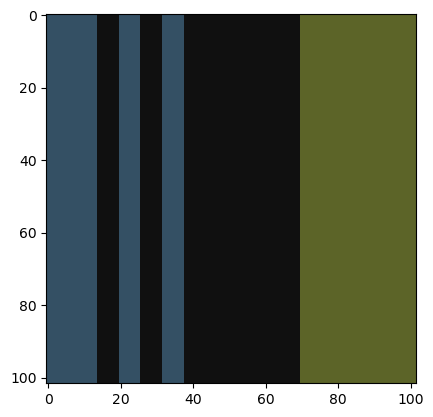

In [43]:
plt.imshow(vertical_stripes)

# Wednesday, March 12th

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Last time, we looked at generating tartan patterns. We constructed tartans by using a checkerboard combination of horizontal and vertical stripes. For the project, we still need to use the more authentic combination. We also need to pad our tartan pattern out to fill a `500` by `500` image.

It would also be nice if we had an easier way of processing the "recipe" for our tartan in order get the widths and color information.

From the project page, we have the sample pattern recipe:

B14 K6 B6 K6 B6 K32 OG32 K6 OG32 K32 B32 K6 B6 K6 B32 K32 OG32 K6 OG32 K32 B6 K6 B6 K6 B28

Last time, we manually typed in the width and color information (or rather, a portion of the recpie) by hand:

In [2]:
B = (52/255, 80/255, 100/255)
K = (16/255, 16/255, 16/255)
OG = (92/255, 100/255, 40/255)

widths = [14, 6, 6, 6, 6, 32, 32]
RGBs = [B, K, B, K, B, K, OG]

Some useful tools for accomplishing this:

In [3]:
pattern_recipe = 'B14 K6 B6 K6 B6 K32 OG32 K6 OG32 K32 B32 K6 B6 K6 B32 K32 OG32 K6 OG32 K32 B6 K6 B6 K6 B28'

Note: our stripe information is separated by spaces. Each stripe is then described by some letters which indicate the color and some numbers which indicate the width.

It would be convenient if we could deal with the stripe information one stripe at a time. To do this, we can use the `.split` method:

In [4]:
pattern_recipe.split()

['B14',
 'K6',
 'B6',
 'K6',
 'B6',
 'K32',
 'OG32',
 'K6',
 'OG32',
 'K32',
 'B32',
 'K6',
 'B6',
 'K6',
 'B32',
 'K32',
 'OG32',
 'K6',
 'OG32',
 'K32',
 'B6',
 'K6',
 'B6',
 'K6',
 'B28']

This will separate the string into substrings that were separated by spaces. More generally, we can supply a string to the `.split` method, and it will split based on the input string as a separator:

In [5]:
s = 'This is an example of a string.'

In [8]:
s

'This is an example of a string.'

In [6]:
s.split()

['This', 'is', 'an', 'example', 'of', 'a', 'string.']

In [7]:
s.split('e')

['This is an ', 'xampl', ' of a string.']

In [9]:
s.split('is')

['Th', ' ', ' an example of a string.']

In our case, splitting the tartan pattern string gives stripe information:

In [11]:
stripe_recipes = pattern_recipe.split()

Can we pull out the width information from a stripe recipe?

In [15]:
stripe_recipe = stripe_recipes[0]

stripe_recipe

'B14'

In [17]:
int(stripe_recipe[-2:])

14

This works for this specific stripe, but other stripes may not have 2-digit widths.


We can use the `.isalpha` and `.isnumeric` methods to test whether a string contains alphabetic or numeric characters:

In [22]:
'a'.isalpha()

True

In [23]:
'3 is my favorite number'.isalpha()

False

In [26]:
'Three is my favorite number'.isalpha()

False

Note: spaces are not considered alphabetic characters.

In [24]:
'3'.isnumeric()

True

In [25]:
'3 is my favorite number'.isnumeric()

False

Back to our stripe recipe:

In [29]:
stripe_recipe

'B14'

In [30]:
[c for c in stripe_recipe if c.isnumeric()]

['1', '4']

The list comprehension above will generate a list of numeric digits in our stripe recipe. We can use the `.join` method on an empty string to concatenate these digits:

In [31]:
''.join([c for c in stripe_recipe if c.isnumeric()])

'14'

Then convert this to an integer:

In [32]:
int(''.join([c for c in stripe_recipe if c.isnumeric()]))

14

Let's put this all together to generate the width information:

In [37]:
pattern_recipe = 'B14 K6 B6 K6 B6 K32 OG32 K6 OG32 K32 B32 K6 B6 K6 B32 K32 OG32 K6 OG32 K32 B6 K6 B6 K6 B28'

In [38]:
widths = []

stripe_recipes = pattern_recipe.split()

for stripe_recipe in stripe_recipes:
    width = int(''.join([c for c in stripe_recipe if c.isnumeric()]))
    widths.append(width)

In [39]:
widths[:10]

[14, 6, 6, 6, 6, 32, 32, 6, 32, 32]

**Exercise:** Modify the code above to also pick out the color code information. You will need to use the `.isalpha` method instead of the `.isnumeric` method.

Once we're able to generate a list of color codes, we need to somehow translate them to the corresponding RGB values.

In [56]:
color_codes = ['B', 'K', 'B', 'K', 'B', 'K', 'OG']

This is a perfect use case for **dictionaries**. In the same way that lists are mapping between indices and values, dictionaries give a way to map **keys** to **values**. For dictionaries, keys can be lots of things (e.g. integers, strings, functions).

In our case, we want to map the strings `'B'`, `'K'`, and `'OG'` to their respective RGB tuples. To define a dictionary, we use curly braces `{}` containing a comma separated list of `<key>:<value>` mappings.

In [57]:
color_code_dict = {'B': (52/255, 80/255, 100/255),
                   'K': (16/255, 16/255, 16/255),
                   'OG': (92/255, 100/255, 40/255)}

We've already defined the variables `B`, `K`, and `OG`, so we could use them here:

In [58]:
color_code_dict = {'B': B,
                   'K': K,
                   'OG': OG}

In [59]:
color_code_dict

{'B': (0.20392156862745098, 0.3137254901960784, 0.39215686274509803),
 'K': (0.06274509803921569, 0.06274509803921569, 0.06274509803921569),
 'OG': (0.3607843137254902, 0.39215686274509803, 0.1568627450980392)}

Just like lists, we access values of a dictionary by plugging in keys with square brackets `[]`:

In [60]:
color_code_dict['B']

(0.20392156862745098, 0.3137254901960784, 0.39215686274509803)

We can now iterate through our color codes and plug them into the dictionary to map the respective RGB values:

In [62]:
color_codes

['B', 'K', 'B', 'K', 'B', 'K', 'OG']

In [63]:
RGBs = [color_code_dict[color_code] for color_code in color_codes]
RGBs

[(0.20392156862745098, 0.3137254901960784, 0.39215686274509803),
 (0.06274509803921569, 0.06274509803921569, 0.06274509803921569),
 (0.20392156862745098, 0.3137254901960784, 0.39215686274509803),
 (0.06274509803921569, 0.06274509803921569, 0.06274509803921569),
 (0.20392156862745098, 0.3137254901960784, 0.39215686274509803),
 (0.06274509803921569, 0.06274509803921569, 0.06274509803921569),
 (0.3607843137254902, 0.39215686274509803, 0.1568627450980392)]

## Comparing with your assigned tartan

For now, I will consider a portion of the sample tartan shown in the project page:

In [65]:
B = (52/255, 80/255, 100/255)
K = (16/255, 16/255, 16/255)
OG = (92/255, 100/255, 40/255)

widths = [14, 6, 6, 6, 6, 32, 32]
RGBs = [B, K, B, K, B, K, OG]

In [66]:
total_width = sum(widths)
vertical_stripes = np.zeros((total_width, total_width, 3))

In [67]:
stripe_start = 0

for width, RGB in zip(widths, RGBs):
    vertical_stripes[:, stripe_start:stripe_start + width] = RGB
    
    stripe_start = stripe_start + width

In [68]:
horizontal_stripes = np.transpose(vertical_stripes,[1,0,2])

In [69]:
tartan = np.zeros((total_width, total_width, 3))

for i in range(total_width):
    for j in range(total_width):
        if (i + j) % 2 == 0:
            tartan[i,j] = vertical_stripes[i,j]
        else:
            tartan[i,j] = horizontal_stripes[i,j]

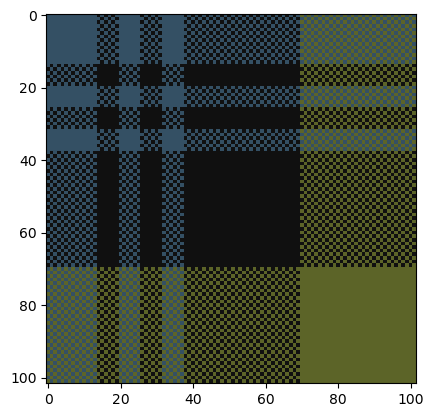

In [70]:
plt.imshow(tartan)

We've generated a portion of the example tartan (with a checkerboard combination). Can we compare this to the example shown on the project page? First, let's download the sample image from the project page.

We can use `plt.imread` to load in a PNG file as an array:

In [72]:
example_tartan = plt.imread('sample_checkerboard_tartan.png')

Note: when reading in with `plt.imread`, we get RGBA data:

In [74]:
example_tartan.shape

(440, 440, 4)

We can just take a slice keep only the first three RGBA channels:

In [75]:
example_tartan = example_tartan[:,:,:3]
example_tartan.shape

(440, 440, 3)

How can we compare this to our tartan we've generated?

Text(0.5, 1.0, 'Example tartan')

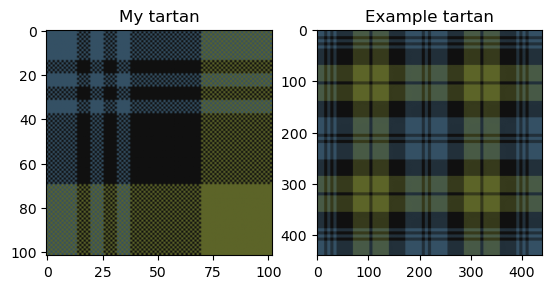

In [77]:
fig = plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(tartan)
plt.title('My tartan')

ax = plt.subplot(1,2,2)
plt.imshow(example_tartan)
plt.title('Example tartan')

Note: I've only used the first few stripes, so this comparison is not valid. For simplicity, let's just take a slice of `example_tartan` that coincides with the stripes that I've used:

Text(0.5, 1.0, 'Example tartan')

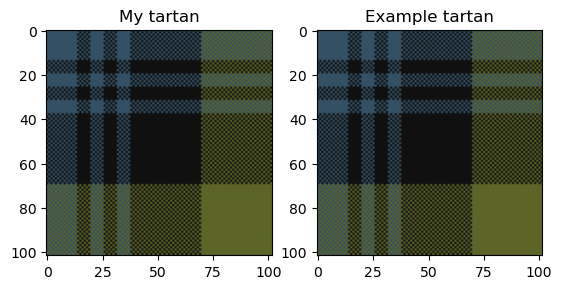

In [78]:
fig = plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(tartan)
plt.title('My tartan')

ax = plt.subplot(1,2,2)
plt.imshow(example_tartan[:total_width, :total_width])
plt.title('Example tartan')

Instead of making this comparison visually, can we numerically compare the two? We could subtract the two arrays and check how close they are to zero:

In [82]:
(tartan - example_tartan[:total_width, :total_width]).max()

-2.7464885365979796e-09

We can see that the maximum difference between all row, column, color combinations is ~$10^{-9}$ (effectively 0).

Let's compare to the authentic tartan:

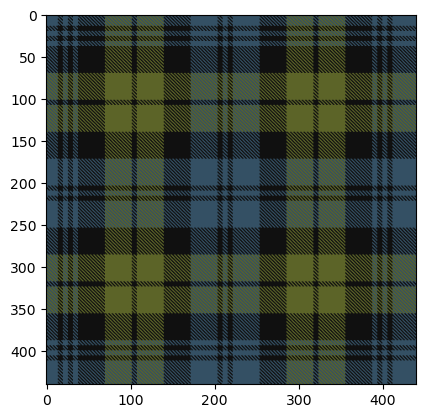

In [83]:
example_tartan = plt.imread('sample_tartan.png')[:,:,:3]
plt.imshow(example_tartan)

Text(0.5, 1.0, 'Example tartan')

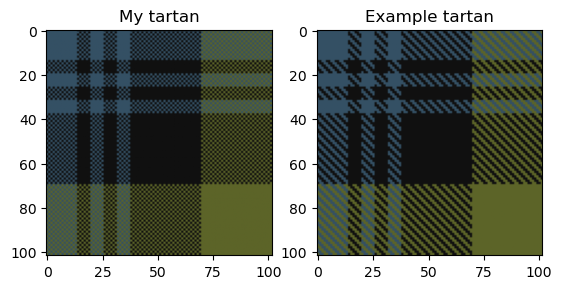

In [84]:
fig = plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(tartan)
plt.title('My tartan')

ax = plt.subplot(1,2,2)
plt.imshow(example_tartan[:total_width, :total_width])
plt.title('Example tartan')

In [87]:
(tartan - example_tartan[:total_width, total_width]).max()

0.32941176099520103

We can also use `plt.imshow` on this difference to see where the discrepencies crop up:

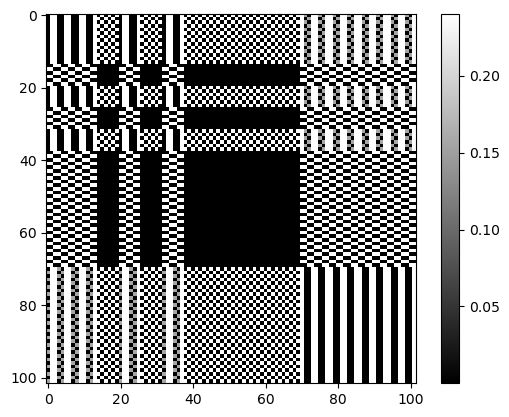

In [93]:
plt.imshow(np.abs(tartan - example_tartan[:total_width, total_width]).mean(axis=2),cmap='gray')
plt.colorbar()